# Practice 1

Student 1: <font color="blue">Alejandro González Álvarez</font>

NIA 1: <font color="blue">252658</font>

Student 2: <font color="blue">Luca Franceschi</font>

NIA 2: <font color="blue">253885</font>

Student 3: <font color="blue">Júlia Othats-Dalès</font>

NIA 3: <font color="blue">254435</font>

# Ex. 1

In [1]:
'''
Steps :
  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes
  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation
  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples
  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.
  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.
'''

'\nSteps :\n  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes\n  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation\n  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples\n  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.\n  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.\n'

## Sol. 1

Training dataset:

   Unnamed: 0         X         Y  C
0           0 -0.263997  1.006942  0
1           1  1.678440 -0.215066  1
2           2 -1.581623 -0.003148  0
3           3 -0.863377  0.751651  0
4           4  0.998721 -0.770067  1
Testing dataset:

   Unnamed: 0         X         Y  C
0           0  1.937660  0.624911  1
1           1 -1.004030 -0.097319  0
2           2  1.542199 -0.114397  0
3           3  0.625708 -0.685214  1
4           4  0.247116 -0.348297  1
Not normalized:



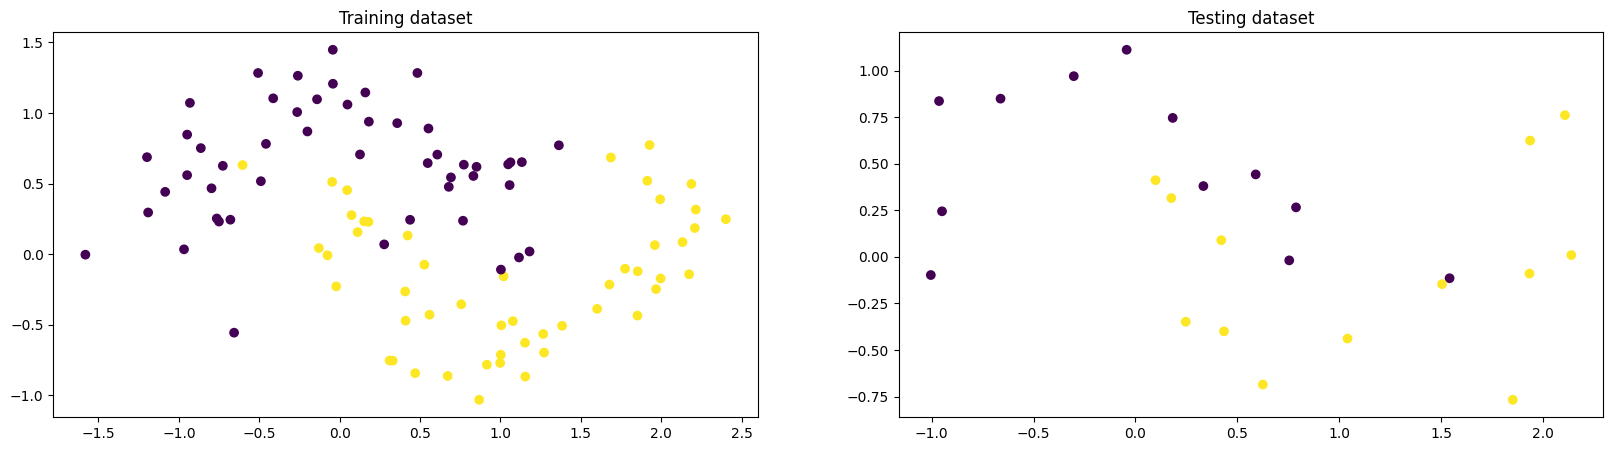


Normalized:



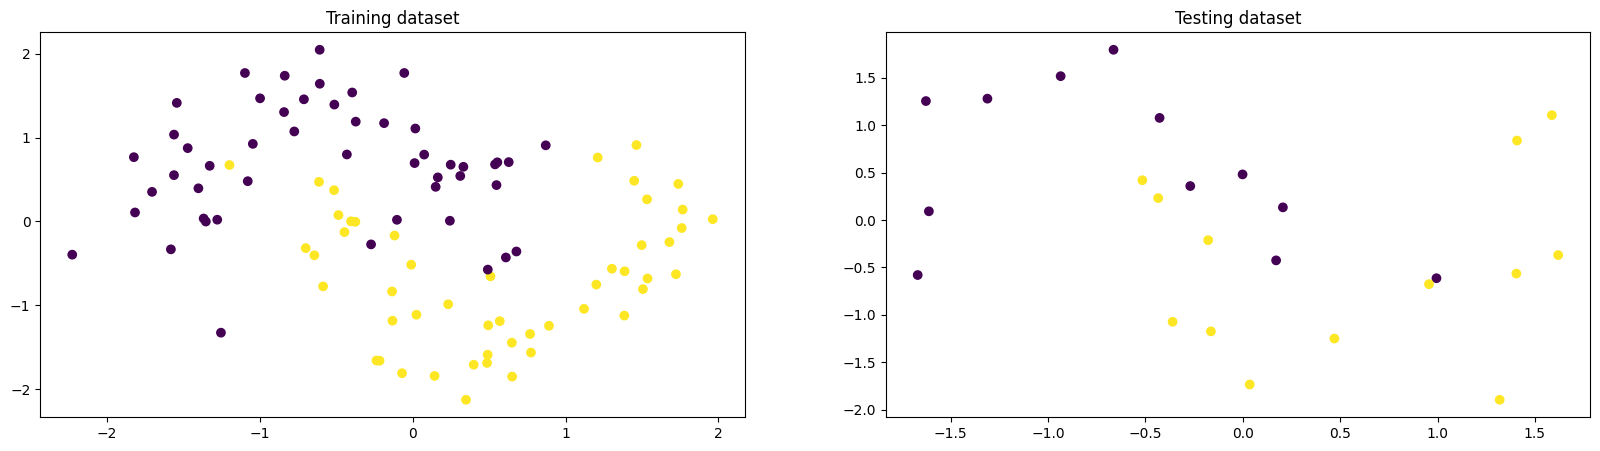

In [2]:
import pandas as pd # usage of Pandas to read and load data
import matplotlib.pyplot as plt # matplotlib for visualization
import numpy as np

#1. Load train.csv and test.csv
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

# Show 5 first elements of the datasets
print("Training dataset:\n")
print(train_df.head(5))
print("Testing dataset:\n")
print(test_df.head(5))

#2. Visualize both training and testing data
print("Not normalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(train_df.X, train_df.Y, c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(test_df.X, test_df.Y, c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

# Normalize data (probar np column stack)
train_x = np.array(train_df[["X"]])
train_y = np.array(train_df[["Y"]].values)
test_x = np.array(test_df[["X"]].values)
test_y = np.array(test_df[["Y"]].values)

train_data = np.column_stack((train_x, train_y))
test_data = np.column_stack((test_x, test_y))

normalized_train = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)
normalized_test = (test_data - np.mean(test_data, axis=0)) / np.std(test_data, axis=0)

# normalized_train = (train_df[["X", "Y"]] - np.mean(train_df[["X", "Y"]], axis = 0)) / np.std(train_df[["X", "Y"]], axis = 0)
# normalized_test = (test_df[["X", "Y"]] - np.mean(test_df[["X", "Y"]], axis = 0)) / np.std(test_df[["X", "Y"]], axis = 0)

print("\nNormalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(normalized_train[:,0], normalized_train[:,1], c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(normalized_test[:,0], normalized_test[:,1], c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

In [3]:
#3. Implementation of the MLP Class:
class MLP(object):
    def __init__(self,inputNode=2, hiddenNode=3, outputNode=1):
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)    # sigmoid(z) * (1 - sigmoid(z))

    def loss(self, yHat, y):
        #Compute loss for given X, y, use weights already stored in class.
        J = np.mean(-y * np.log(yHat) - (1-y)*np.log(1-yHat))
        return J

    # Derivative of parameters
    def backward(self, X, yHat, y):
        self.yHat = yHat
        delta3 = (yHat - y)     # dL / dz3
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1,dJdW2
    
# Function to train a neural network (NN)
def train(NN, X, y, epoch = 10000, lr = .1):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X, yHat, y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            if i%100 == 0: 
                print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

def predict(NN, X):
    return np.round(NN.forward(X))

def accuracy(y, yHat):
    error = 0
    for c1, c2 in zip(y, yHat):
        if c1 != c2:
            error += 1
    return 1 - (error/len(y))

Loss 0=0.711362914863171
Loss 100=0.34570384678628213
Loss 200=0.3373262657207846
Loss 300=0.33579852301722396
Loss 400=0.33470585193623015
Loss 500=0.33385487998286906
Loss 600=0.33317062177224827
Loss 700=0.3325985280947769
Loss 800=0.3320950781030783
Loss 900=0.33161957731411845
Loss 1000=0.33112560694005566
Loss 1100=0.3305529597550229
Loss 1200=0.32982710376254737
Loss 1300=0.32888143118924995
Loss 1400=0.32770334856168226
Loss 1500=0.32635591103727535
Loss 1600=0.3249321626975144
Loss 1700=0.3234922451005662
Loss 1800=0.32204648106090317
Loss 1900=0.3205748686821799
Loss 2000=0.31904894159328095
Loss 2100=0.3174426740891905
Loss 2200=0.3157349642422718
Loss 2300=0.31390936035787814
Loss 2400=0.3119550740448574
Loss 2500=0.30987070826315355
Loss 2600=0.30766889923483975
Loss 2700=0.3053778984861971
Loss 2800=0.30303777636622403
Loss 2900=0.30069327539517193
Loss 3000=0.298387416307066
Loss 3100=0.29615797828941437
Loss 3200=0.29403618905784085
Loss 3300=0.29204621058987734
Loss 34

Text(0, 0.5, 'Loss (J) value')

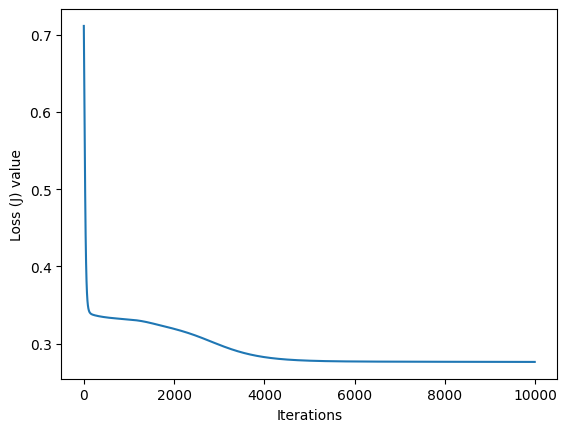

In [16]:
# Instantiate an MLP NN
mlp = MLP()

#4. Train the MLP, visualize decision boundary in 2D, and plot loss at each iteration
list_loss = train(mlp, train_df[["X", "Y"]], np.array([train_df.C]).reshape(100, 1), epoch = 10000, lr = 0.01)

# arange used for better visualization of iterations
plt.plot(10 * np.arange(len(list_loss)), list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')

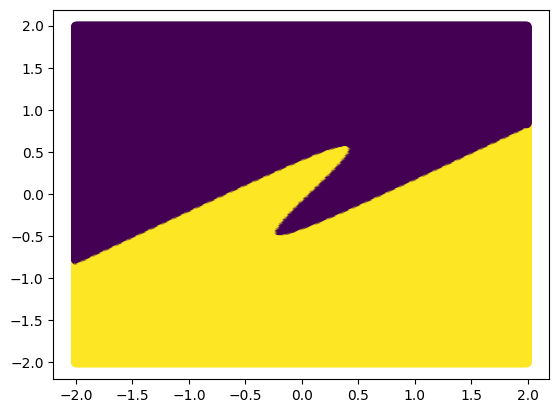

In [17]:
# Visualize the decision boundary in 2D of the classification
xx, yy = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(-2, 2, 0.01))
xd = np.column_stack((xx.flatten(), yy.flatten()))
xd2 = predict(mlp, xd)
plt.scatter(xx, yy, c=xd2)
# plt.contour([normalized_test[:, 0], normalized_test[:, 1]], )

In [6]:
# 5. Apply on test dataset, and accuracy
test_yHat = predict(mlp, normalized_test)

test_accuracy = accuracy(test_df.C, test_yHat)
print("Accuracy obtained in test dataset: %.2f" % (test_accuracy * 100) + " %.")

Accuracy obtained in test dataset: 76.00 %.


# Ex. 2

In [7]:
'''
Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.
Steps :
  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum
  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.
  3. Train the MLP implmented in numpy with this new optimizer.
  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.
'''


'\nInstead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.\nThis optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.\nSteps :\n  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum\n  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.\n  3. Train the MLP implmented in numpy with this new optimizer.\n  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.\n'

## Sol. 2

# Ex. 3

In [8]:
'''
Steps :
  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.
  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates
  3. Analyse the results in each case and discuss them.

HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.
'''

'\nSteps :\n  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.\n  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates\n  3. Analyse the results in each case and discuss them.\n\nHINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.\n'

## Sol. 3